# Quantum teleportation
First import what are needed for the whole notebook.

In [1]:
from qiskit.circuit import QuantumCircuit
from qiskit.primitives import Estimator, Sampler
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_histogram

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background') # optional

# Set up

Setting up needed qubits.

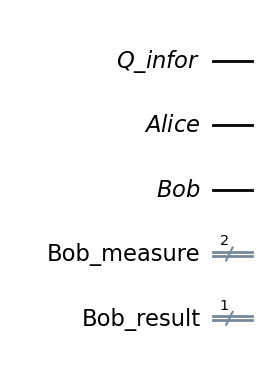

In [5]:
from qiskit.circuit import ClassicalRegister, QuantumRegister
infor = QuantumRegister(1, 'Q_infor')
alice = QuantumRegister(1, 'Alice')
bob = QuantumRegister(1, 'Bob')
bob_measure = ClassicalRegister(2, 'Bob_measure')
bob_result = ClassicalRegister(1, 'Bob_result')

qc_tele = QuantumCircuit()
qc_tele.add_register(infor,alice, bob, bob_measure, bob_result)

qc_tele.draw()

# Add the teleportation circuit

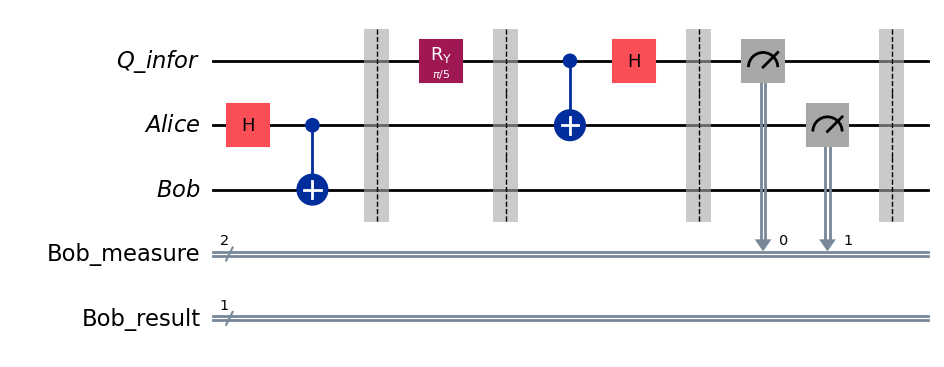

In [6]:
#the bell pair
qc_tele.h(1)
qc_tele.cx(1,2)
qc_tele.barrier()

#teleportation part
#the information waiting to be sent
#qc_tele.h(0)
qc_tele.ry(np.pi/5, 0)
qc_tele.barrier()

qc_tele.cx(0,1)
qc_tele.h(0)
qc_tele.barrier()

qc_tele.measure([infor[0], alice[0]], bob_measure)
qc_tele.barrier()

qc_tele.draw()

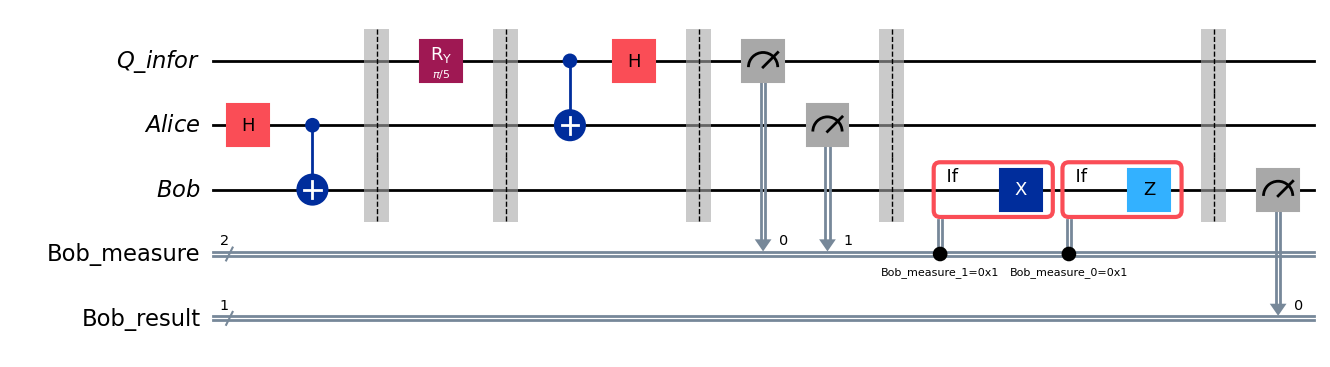

In [7]:
with qc_tele.if_test((bob_measure[1], 1)):
    qc_tele.x(bob[0])
with qc_tele.if_test((bob_measure[0], 1)):
    qc_tele.z(bob[0])
qc_tele.barrier()

qc_tele.measure(bob[0], bob_result)

qc_tele.draw()

# See the results.

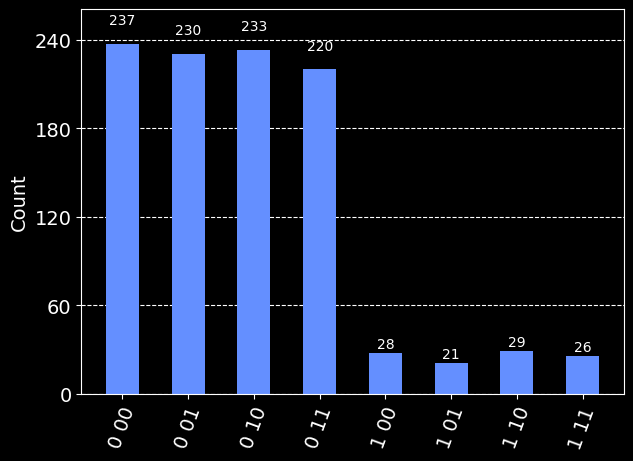

In [8]:
from qiskit_aer import AerSimulator
result = AerSimulator().run(qc_tele).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

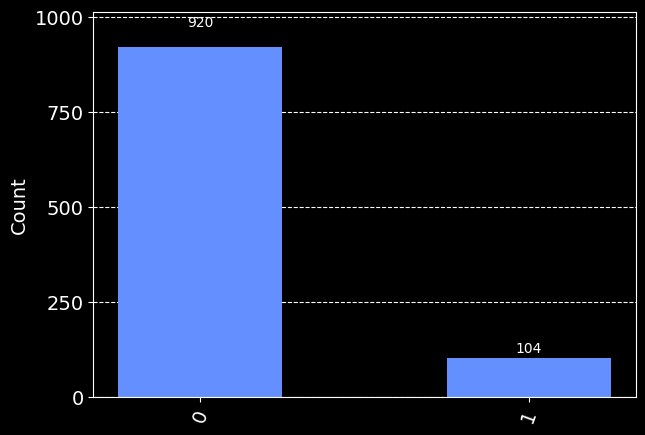

In [9]:
from qiskit.result import marginal_distribution
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))